# Onde a Ciência de Dados pode atuar no Agronegócio?


Recentemente, observamos o conceito emergente de agricultura inteligente que torna a agricultura mais eficiente e eficaz com a ajuda de algoritmos de alta precisão.

O Aprendizado de Máquina ajuda a quantificar e compreender processos intensivos de dados em ambientes operacionais agrícolas.

O aprendizado de máquina está em todo o ciclo de cultivo e colheita.

Começa com o plantio de uma semente no solo - desde o preparo do solo, procriação de sementes e medição da alimentação de água - e termina quando as redes neurais fazem a colheita determinando a maturação com a ajuda da visão computacional.



## Casos Frequentes de uso de Ciência de Dados no Agro

- Previsão de Demanda dos Produtos e de Insumos para produção

- Otimização da Cadeia de Suprimentos

- Detecção e Prevenção de Pragas

- Otimização da lavoura

- Inspeção Visual

- Máquinas Autônomas

- Gerenciamento de Água

- Previsão da Qualidade da Colheita

- Detecção de Ervas Daninhas

Um caso especial que a Ciência de Dados pode ajudar para o sucesso da colheita é o gerenciamento dos Pesticidas Tóxicos
O trabalho de um fazendeiro é um verdadeiro teste de resistência e determinação.

Depois de plantadas as sementes, ele trabalha dias e noites para se certificar de que terá uma boa colheita no final da temporada.



Uma boa colheita é garantida por vários fatores, como disponibilidade de água, fertilidade do solo, proteção das colheitas contra roedores, uso oportuno de pesticidas e outros produtos químicos úteis.

Embora muitos desses fatores sejam difíceis de controlar, a quantidade e a frequência dos pesticidas são algo que o agricultor pode controlar.


Os agrotóxicos também são especiais, pois protegem a lavoura com a dosagem certa.

Mas, se você adicionar mais do que o necessário, eles podem estragar toda a colheita.



Um alto nível de pesticida pode considerar a safra morta / inadequada para consumo entre muitos resultados.

#1° Problema de Negócio

Precisamos prever o resultado da temporada de colheita, ou seja, se a cultura seria:

1. Saudável (viva)

2. Danificada por pesticidas ou

3. Danificada por outros motivos.

Os dados são baseados em safras colhidas por vários agricultores no final da temporada de colheita.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from xgboost import plot_importance
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
dados_agro=pd.read_csv("treino.csv")

In [5]:
dados_agro.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


## 2° Análise Exploratória dos Dados

1. **ID - UniqueID**
2. **Estimated_Insects_Count** - Contagem estimada de insetos por metro quadrado
3. **Crop_Type** - Categoria de cultivo (0,1)
4. **Tipo_do solo** - Categoria do solo (0,1)
5. **Pesticide_Use_Category** - Tipo de uso de pesticidas (1- 6. Nunca, 2-Usado anteriormente, 3-Usando atualmente)
7. **Number_Doses_Week** - Número de doses por semana
8. **Number_Weeks_Used** - Número de semanas usadas
9. **Number_Weeks_Quit** - Número de semanas de desistência
10. **Temporada** - Categoria Temporada (1,2,3)
11. **Crop_Damage** - Categoria de dano de cultivo (0 = vivo, 1 = dano devido a outras causas, 2 = dano devido a pesticidas)

In [6]:
dados_agro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [7]:
dados_agro["Crop_Damage"].value_counts()

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

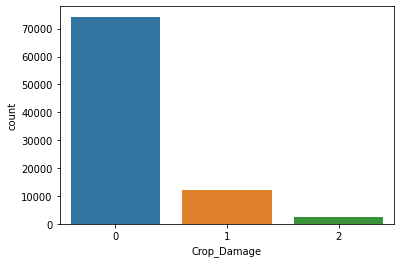

In [12]:
sns.countplot(x=dados_agro.Crop_Damage);

In [14]:
dados_agro["Season"].value_counts()

2    44210
1    26902
3    17746
Name: Season, dtype: int64

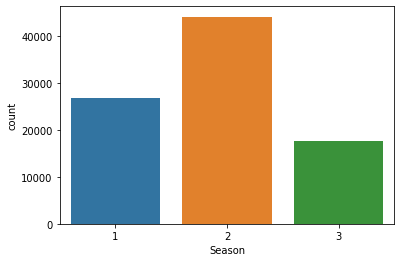

In [18]:
sns.countplot(x=dados_agro.Season);

In [19]:
dados_agro["Pesticide_Use_Category"].value_counts()

2    63709
3    24312
1      837
Name: Pesticide_Use_Category, dtype: int64

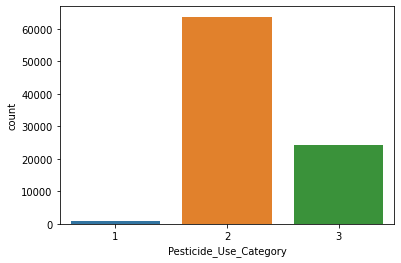

In [20]:
sns.countplot(x=dados_agro["Pesticide_Use_Category"]);

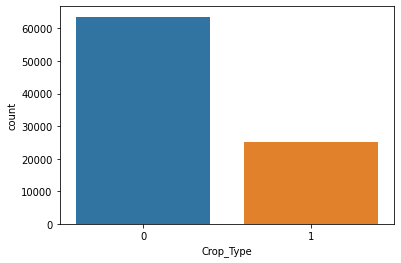

In [22]:
sns.countplot(x=dados_agro.Crop_Type);

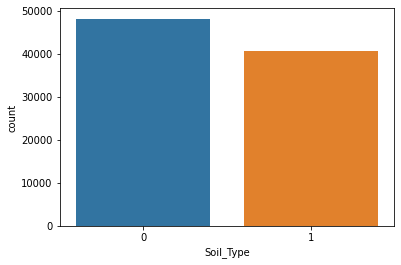

In [24]:
sns.countplot(x=dados_agro.Soil_Type);

In [25]:
dados_agro.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [26]:
dados_agro.duplicated().sum()

0

In [28]:
dados_agro["Estimated_Insects_Count"].describe()

count    88858.000000
mean      1399.012210
std        849.048781
min        150.000000
25%        731.000000
50%       1212.000000
75%       1898.000000
max       4097.000000
Name: Estimated_Insects_Count, dtype: float64

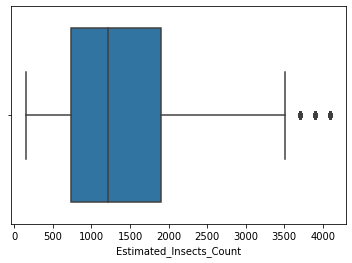

In [30]:
sns.boxplot(x=dados_agro["Estimated_Insects_Count"]);

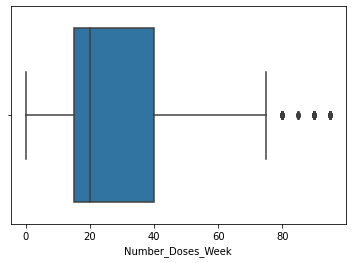

In [34]:
sns.boxplot(x=dados_agro.Number_Doses_Week);

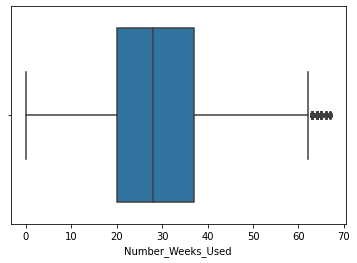

In [33]:
sns.boxplot(x=dados_agro.Number_Weeks_Used);

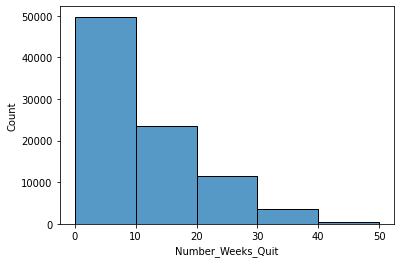

In [38]:
sns.histplot(x=dados_agro.Number_Weeks_Quit,bins=5);

## 3° Pré-Processamento dos Dados

In [40]:
dados_agro.drop("ID",axis=1,inplace=True)

In [41]:
dados_agro.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


In [42]:
dados_agro.dropna(inplace=True)

In [43]:
dados_agro.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


In [44]:
for col in ['Crop_Type','Soil_Type','Pesticide_Use_Category','Season']:
    dados_agro=pd.get_dummies(dados_agro,columns=[col])

In [45]:
dados_agro.head()

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Damage,Crop_Type_0,Crop_Type_1,Soil_Type_0,Soil_Type_1,Pesticide_Use_Category_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_1,Season_2,Season_3
0,188,0,0.0,0,0,0,1,1,0,1,0,0,1,0,0
1,209,0,0.0,0,1,0,1,1,0,1,0,0,0,1,0
2,257,0,0.0,0,1,0,1,1,0,1,0,0,0,1,0
3,257,0,0.0,0,1,0,1,0,1,1,0,0,0,1,0
4,342,0,0.0,0,1,0,1,1,0,1,0,0,0,1,0


In [46]:
x=dados_agro.drop("Crop_Damage",axis=1)
y=dados_agro["Crop_Damage"].values.reshape(-1,1)

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [51]:
modelo=CatBoostClassifier(n_estimators=1000,max_depth=4,random_state=7)

In [52]:
modelo.fit(x_train,y_train)

Learning rate set to 0.097814
0:	learn: 0.9832092	total: 250ms	remaining: 4m 10s
1:	learn: 0.8949168	total: 264ms	remaining: 2m 11s
2:	learn: 0.8266158	total: 274ms	remaining: 1m 30s
3:	learn: 0.7706912	total: 285ms	remaining: 1m 10s
4:	learn: 0.7241909	total: 294ms	remaining: 58.5s
5:	learn: 0.6857756	total: 305ms	remaining: 50.6s
6:	learn: 0.6533072	total: 318ms	remaining: 45.1s
7:	learn: 0.6249385	total: 331ms	remaining: 41s
8:	learn: 0.6010892	total: 341ms	remaining: 37.5s
9:	learn: 0.5798398	total: 351ms	remaining: 34.7s
10:	learn: 0.5617840	total: 361ms	remaining: 32.5s
11:	learn: 0.5470850	total: 371ms	remaining: 30.6s
12:	learn: 0.5335494	total: 383ms	remaining: 29.1s
13:	learn: 0.5221289	total: 396ms	remaining: 27.9s
14:	learn: 0.5116100	total: 411ms	remaining: 27s
15:	learn: 0.5023982	total: 422ms	remaining: 26s
16:	learn: 0.4942070	total: 433ms	remaining: 25s
17:	learn: 0.4877251	total: 442ms	remaining: 24.1s
18:	learn: 0.4815039	total: 455ms	remaining: 23.5s
19:	learn: 0.47

178:	learn: 0.4173002	total: 2.29s	remaining: 10.5s
179:	learn: 0.4172489	total: 2.3s	remaining: 10.5s
180:	learn: 0.4172165	total: 2.31s	remaining: 10.5s
181:	learn: 0.4171912	total: 2.32s	remaining: 10.4s
182:	learn: 0.4171467	total: 2.34s	remaining: 10.4s
183:	learn: 0.4171124	total: 2.35s	remaining: 10.4s
184:	learn: 0.4170874	total: 2.36s	remaining: 10.4s
185:	learn: 0.4170072	total: 2.38s	remaining: 10.4s
186:	learn: 0.4169935	total: 2.38s	remaining: 10.4s
187:	learn: 0.4169388	total: 2.4s	remaining: 10.3s
188:	learn: 0.4169188	total: 2.41s	remaining: 10.3s
189:	learn: 0.4168924	total: 2.42s	remaining: 10.3s
190:	learn: 0.4167822	total: 2.43s	remaining: 10.3s
191:	learn: 0.4166770	total: 2.44s	remaining: 10.3s
192:	learn: 0.4166463	total: 2.45s	remaining: 10.3s
193:	learn: 0.4166001	total: 2.46s	remaining: 10.2s
194:	learn: 0.4165841	total: 2.47s	remaining: 10.2s
195:	learn: 0.4165589	total: 2.48s	remaining: 10.2s
196:	learn: 0.4165298	total: 2.5s	remaining: 10.2s
197:	learn: 0.4

348:	learn: 0.4118638	total: 4.31s	remaining: 8.04s
349:	learn: 0.4118526	total: 4.32s	remaining: 8.03s
350:	learn: 0.4118459	total: 4.33s	remaining: 8.01s
351:	learn: 0.4118398	total: 4.34s	remaining: 8s
352:	learn: 0.4118068	total: 4.36s	remaining: 7.99s
353:	learn: 0.4117818	total: 4.37s	remaining: 7.98s
354:	learn: 0.4117574	total: 4.38s	remaining: 7.96s
355:	learn: 0.4117467	total: 4.39s	remaining: 7.94s
356:	learn: 0.4117237	total: 4.4s	remaining: 7.93s
357:	learn: 0.4116996	total: 4.42s	remaining: 7.92s
358:	learn: 0.4116685	total: 4.43s	remaining: 7.91s
359:	learn: 0.4116609	total: 4.44s	remaining: 7.89s
360:	learn: 0.4116353	total: 4.45s	remaining: 7.88s
361:	learn: 0.4116258	total: 4.46s	remaining: 7.86s
362:	learn: 0.4116050	total: 4.47s	remaining: 7.85s
363:	learn: 0.4115880	total: 4.48s	remaining: 7.83s
364:	learn: 0.4115665	total: 4.49s	remaining: 7.81s
365:	learn: 0.4115135	total: 4.5s	remaining: 7.8s
366:	learn: 0.4115111	total: 4.51s	remaining: 7.79s
367:	learn: 0.4114

513:	learn: 0.4086641	total: 6.14s	remaining: 5.8s
514:	learn: 0.4086519	total: 6.15s	remaining: 5.79s
515:	learn: 0.4086406	total: 6.16s	remaining: 5.78s
516:	learn: 0.4086212	total: 6.18s	remaining: 5.77s
517:	learn: 0.4085949	total: 6.19s	remaining: 5.76s
518:	learn: 0.4085868	total: 6.2s	remaining: 5.75s
519:	learn: 0.4085710	total: 6.21s	remaining: 5.74s
520:	learn: 0.4085470	total: 6.22s	remaining: 5.72s
521:	learn: 0.4085420	total: 6.24s	remaining: 5.71s
522:	learn: 0.4085276	total: 6.25s	remaining: 5.7s
523:	learn: 0.4085142	total: 6.25s	remaining: 5.68s
524:	learn: 0.4084725	total: 6.26s	remaining: 5.67s
525:	learn: 0.4084556	total: 6.28s	remaining: 5.65s
526:	learn: 0.4084434	total: 6.29s	remaining: 5.64s
527:	learn: 0.4084078	total: 6.3s	remaining: 5.63s
528:	learn: 0.4083971	total: 6.31s	remaining: 5.62s
529:	learn: 0.4083737	total: 6.32s	remaining: 5.6s
530:	learn: 0.4083511	total: 6.33s	remaining: 5.59s
531:	learn: 0.4083433	total: 6.34s	remaining: 5.57s
532:	learn: 0.408

683:	learn: 0.4062921	total: 8.2s	remaining: 3.79s
684:	learn: 0.4062821	total: 8.21s	remaining: 3.78s
685:	learn: 0.4062753	total: 8.23s	remaining: 3.77s
686:	learn: 0.4062582	total: 8.24s	remaining: 3.75s
687:	learn: 0.4062183	total: 8.25s	remaining: 3.74s
688:	learn: 0.4062092	total: 8.26s	remaining: 3.73s
689:	learn: 0.4062078	total: 8.27s	remaining: 3.71s
690:	learn: 0.4061913	total: 8.28s	remaining: 3.7s
691:	learn: 0.4061794	total: 8.29s	remaining: 3.69s
692:	learn: 0.4061654	total: 8.31s	remaining: 3.68s
693:	learn: 0.4061518	total: 8.32s	remaining: 3.67s
694:	learn: 0.4061416	total: 8.33s	remaining: 3.65s
695:	learn: 0.4061355	total: 8.34s	remaining: 3.64s
696:	learn: 0.4061275	total: 8.35s	remaining: 3.63s
697:	learn: 0.4061259	total: 8.36s	remaining: 3.62s
698:	learn: 0.4061127	total: 8.37s	remaining: 3.6s
699:	learn: 0.4060962	total: 8.38s	remaining: 3.59s
700:	learn: 0.4060795	total: 8.39s	remaining: 3.58s
701:	learn: 0.4060689	total: 8.4s	remaining: 3.57s
702:	learn: 0.40

848:	learn: 0.4042073	total: 10s	remaining: 1.78s
849:	learn: 0.4042026	total: 10.1s	remaining: 1.77s
850:	learn: 0.4041948	total: 10.1s	remaining: 1.76s
851:	learn: 0.4041767	total: 10.1s	remaining: 1.75s
852:	learn: 0.4041699	total: 10.1s	remaining: 1.74s
853:	learn: 0.4041600	total: 10.1s	remaining: 1.73s
854:	learn: 0.4041488	total: 10.1s	remaining: 1.71s
855:	learn: 0.4041454	total: 10.1s	remaining: 1.7s
856:	learn: 0.4041409	total: 10.1s	remaining: 1.69s
857:	learn: 0.4041318	total: 10.1s	remaining: 1.68s
858:	learn: 0.4041245	total: 10.1s	remaining: 1.67s
859:	learn: 0.4041038	total: 10.2s	remaining: 1.65s
860:	learn: 0.4040961	total: 10.2s	remaining: 1.64s
861:	learn: 0.4040820	total: 10.2s	remaining: 1.63s
862:	learn: 0.4040648	total: 10.2s	remaining: 1.62s
863:	learn: 0.4040422	total: 10.2s	remaining: 1.6s
864:	learn: 0.4040000	total: 10.2s	remaining: 1.59s
865:	learn: 0.4039892	total: 10.2s	remaining: 1.58s
866:	learn: 0.4039728	total: 10.2s	remaining: 1.57s
867:	learn: 0.40

In [53]:
predicao=modelo.predict(x_test)

In [54]:
predicao

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [55]:
predicao1=modelo.predict_proba(x_test)

In [56]:
predicao1

array([[9.53754269e-01, 4.27253085e-02, 3.52042301e-03],
       [9.14141825e-01, 7.70740521e-02, 8.78412333e-03],
       [6.24136592e-01, 3.19394971e-01, 5.64684369e-02],
       ...,
       [9.76521692e-01, 2.30531223e-02, 4.25185795e-04],
       [7.81616051e-01, 1.96208830e-01, 2.21751187e-02],
       [9.85054385e-01, 1.38732317e-02, 1.07238327e-03]])

In [57]:
result=modelo.score(x_test,y_test)

In [58]:
print("Acurácia nos Dados de Teste: %.3f%%" % (result * 100.0))

Acurácia nos Dados de Teste: 80.103%


In [59]:
modelo.feature_importances_

array([21.36537105, 18.29694341, 25.21854051, 11.53187023,  1.84298933,
        1.66553058,  0.92037955,  0.57402227,  0.60262598,  9.50784327,
        6.34740699,  0.78616794,  0.56192349,  0.7783854 ])